##  GA HITS

Данные ***ga_hits***  содержат информацию о действиях совершаемых потенциальным клиентом на  сайте «СберАвтоподписка» : просмотр страниц с вариантами автомобиля, создание личного кабинета, заказ звонка, подписка на рассылку. Данные позволяют понять интересы посетителя и спрос на автомобили.

#### Целевое действие — события типа «Оставить заявку» и «Заказать звонок»
(ga_hits.event_action in ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']).


#### CR (Conversion Rate) — показатель конверсии из визита 
(уникальный session_id) в любое целевое действие в рамках одного визита (в случае наличия 1 целевого действия — считать все как одно).

**Информация про марку и модель авто — содержится** в ga_hits.hit_page_path.


# 0. Импорт необходимых библиотек

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib.ticker import FormatStrFormatter

# 1. Загрузка исходных файлов

**Описание атрибутов:**

*Одна строка = одно событие в рамках одного визита на сайт*
- session_id — ID визита;
- hit_date — дата события;
- hit_time — время события;
- hit_number — порядковый номер события в рамках сессии;
- hit_type — тип события;
- hit_referer — источник события;
- hit_page_path — страница события;
- event_category — тип действия;
- event_action — действие;
- event_label — тег действия;
- event_value — значение результата действия.

In [2]:
df_hits = pd.read_csv('data/ga_hits.csv')
print(f'Размер выбоpки: {df_hits.shape[0]}, { df_hits.shape[1]}')
df_hits.head()

Размер выбоpки: 15726470, 11


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


# 2. Data preparation

##  Data Cleaning

##### Создание копии исходного файла

In [3]:
df_h = df_hits.copy()
print(f'Размер выборки: {df_h.shape[0]}, {df_h.shape[1]}')
df_h.head()

Размер выборки: 15726470, 11


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


###### Проверка на наличие дубликатов

In [4]:
print(f'Количество дубликатов в ga_hits: {df_h.duplicated().sum()}')

Количество дубликатов в ga_hits: 0


##### Информация по выборке

In [5]:
print('Информация о выборке: \n')
df_h.info()

Информация о выборке: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


##### Проверка на наличие пропущенных значений

In [6]:
missing_values = ((df_h.isna().sum()/len(df_h)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


event_value       100.000000
hit_time           58.247795
hit_referer        39.899634
event_label        23.909905
session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
dtype: float64

##### Сводная таблица ga_hits

In [7]:
df_h.describe(include='all').loc[['count', 'unique', 'freq', 'top']].T

,count,unique,freq,top
session_id,15726470,1734610,768,5442565791571325612.1632449195.1632449195
hit_date,15726470,226,513035,2021-05-24
hit_time,6566148.0,NaN,NaN,NaN
hit_number,15726470.0,NaN,NaN,NaN
hit_type,15726470,1,15726470,event
hit_referer,9451666,37873,8879187,HbolMJUevblAbkHClEQa
hit_page_path,15726470,342715,2793639,podpiska.sberauto.com/
event_category,15726470,52,7456998,card_web
event_action,15726470,230,3558985,view_card
event_label,11966286,39825,6505447,KclpemfoHstknWHFiLit


**Из сводной таблицы датасета видно, что**
1. Колонка **session_id** не содержит пропусков. Уникальных значений **1734610**. Максимальное количество событий за сессию **768**.
2. Чаще всего сайт посещался в первый месяц действия сервиса.
3. Признаки **hit_time**, **event_value**, **hit_number** и **hit_type** не несут никакой полезной информации.
4. Самым популярным источником (**hit_referer**) события является **HbolMJUevblAbkHClEQa**.
5. Самой часто посещаемой страницей является **podpiska.sberauto.com**.  
6. Чуть меньше половины действий происходят с карточкой(**card_web**). 
7. Чаще всего карточку просматривают (**view_card**). 
8. Признаки **hit_referer** и **event_label** зашифрованы.  Оба признака содержат более 20 % пропущенных значений, что не позволяет удалить строки с пропусками из-за возможности потери данных. Так же из-за большого количества пропусков восстановление данных не целесообразно. Поэтому логично удалить столбцы **hit_time**, **event_value**, **hit_number**, **hit_type**, **hit_referer** и **event_label**.
9. Наибольший интерес представляют столбцы **session_id**, **hit_date**, **hit_page_path** и **event_action**. Их следует рассмотреть подробнее.

***Удаление колонок***

In [8]:
columns_to_drop = ['event_value', 'hit_time', 'hit_number', 'hit_type', 'hit_referer', 'event_label']
df_h.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
print('Информация о выборке: \n')
df_h.info()

Информация о выборке: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   hit_date        object
 2   hit_page_path   object
 3   event_category  object
 4   event_action    object
dtypes: object(5)
memory usage: 599.9+ MB


### `session_id - ID визита`

In [4]:
event_counts = df_h['session_id'].value_counts()
event_counts.name = 'event_counts'
event_counts

5442565791571325612.1632449195.1632449195    768
6568868914238486437.1632270313.1632270313    678
5959671972744778783.1632490527.1632490600    548
7452598043578978502.1632358598.1632358598    514
3070792010704358528.1629752408.1629752408    498
                                            ... 
4570994095441102117.1630324006.1630324006      1
768506153535315810.1630314342.1630314342       1
5517253735248338264.1630315080.1630315080      1
4054272189286640867.1630334209.1630334209      1
5381267721977892188.1640271196.1640271196      1
Name: event_counts, Length: 1734610, dtype: int64

In [5]:
event_counts.value_counts().head(10)

1     537243
2     237658
6      88086
3      85233
4      63603
9      61938
8      58599
7      51344
10     48890
12     42442
Name: event_counts, dtype: int64

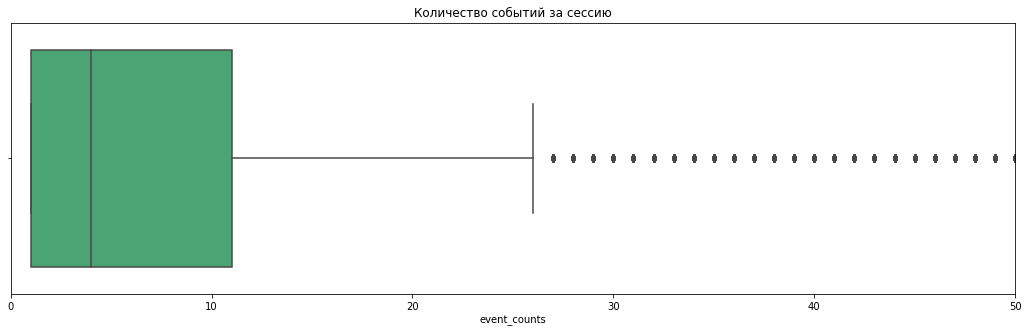

In [8]:
plt.figure(figsize = (18, 5)) 
plt.title('Количество событий за сессию')
plt.xlim(0, 50)
my_color = ['mediumseagreen']
sns.set_palette(my_color)
sns.boxplot(x = event_counts);

Дополнительное исследование колонки **session_id** показало, что большая часть сессий заканчивается с 1 - 2 событиями. Минимальное количество событий за сессию - 1, максимальное - 768. Дальнейшие преобразования будут проводиться, если понадобится, после объединения датасетов. Поле session_id являтся внешним ключом.

### `hit_date — дата события`

In [9]:
df_h['hit_date'] = pd.to_datetime(df_h['hit_date'])

In [10]:
df_h['hit_date'].describe(datetime_is_numeric=True)

count                         15726470
mean     2021-09-22 23:21:46.111746304
min                2021-05-19 00:00:00
25%                2021-07-25 00:00:00
50%                2021-10-03 00:00:00
75%                2021-11-22 00:00:00
max                2021-12-31 00:00:00
Name: hit_date, dtype: object

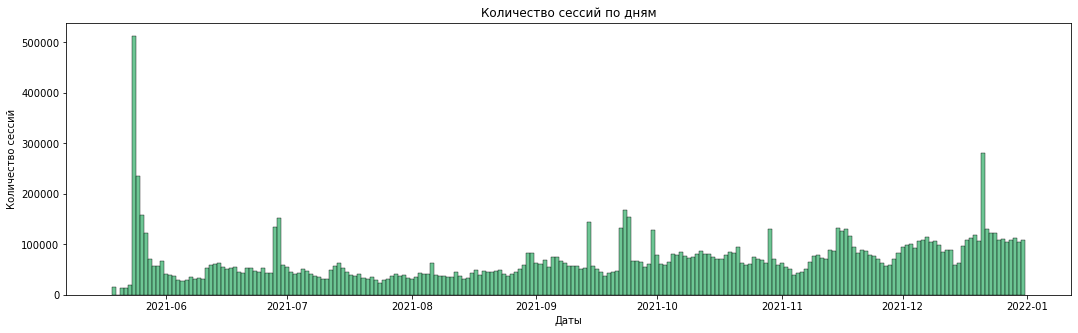

In [11]:
plt.figure(figsize = (18, 5))
sns.histplot(df_h, x = 'hit_date', discrete=True)
plt.xlabel('Даты')
plt.ylabel('Количество сессий')
plt.title('Количество сессий по дням');

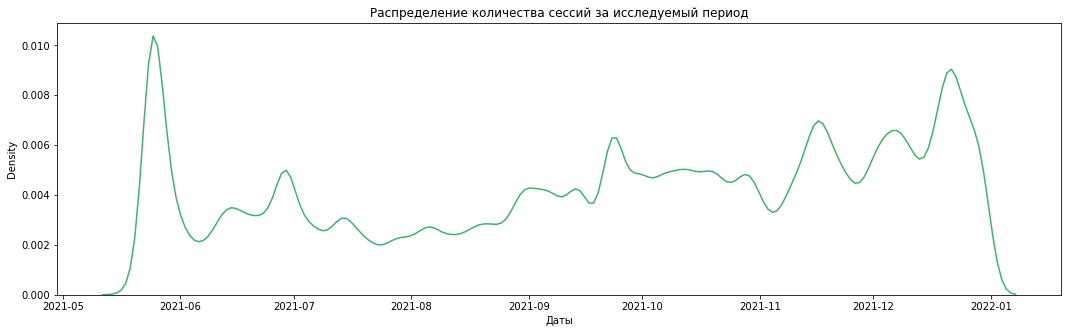

In [12]:
plt.figure(figsize = (18, 5))
sns.kdeplot(df_h, x = 'hit_date')
plt.xlabel('Даты')
plt.title('Распределение количества сессий за исследуемый период');

In [21]:
n_unique = df_h['hit_date'].nunique()
print(f'Количество уникальных значений в hit_date: {n_unique}')

Количество уникальных значений в hit_date: 226


Дополнительное исследование колонки **hit_date** показало, что выборка представлена за период **226 дней**, в диапазоне **19 мая 2021 - 31 декабря 2021**. Что соответствует периоду работы сервиса "СберАвтоподписка" в 2021 году.

Через несколько дней после начала работы сервиса заметен существенный пик посещаемости сайта. Возможно, это связано с новостями о появлении нового сервиса, а также с массированной рекламой. 

Наблюдаемый на графике легкий восходящий тренд может говорить о постепенном наборе популярности сервиса.

### `hit_page_path — страница события`

Колонка **hit_page_path** содержит информацию о марке и модели автомобиля. Следовательно, можно создать две фичи **brand** и **model** и удалить исходную колонку за ненадобностью.

In [24]:
df_h['brand'] = df_h.hit_page_path.apply(lambda x: x.split('/')[3]
                           if (x.find('sberauto.com/cars/all/') != -1 or x.find('sberauto-team.com/cars/all/') != -1)
                               
                           else
                           (x.split('?')[0].split('/')[2]
                            if (x.find('sberauto.com/cars/all/') == -1
                                and x.find('sberauto.com/cars/') != -1
                                and (x.split('?')[0].split('/')[2].isalpha() == True
                                     or x.split('?')[0].split('/')[2].find('-') != -1))
                            else np.nan))

df_h['model'] = df_h.hit_page_path.apply(lambda x: x.split('/')[4]
                           if (x.find('sberauto.com/cars/all/') != -1
                               or x.find('sberauto-team.com/cars/all/') != -1)
                           else
                           (x.split('?')[0].split('/')[3]
                            if (x.find('sberauto.com/cars/all/') == -1
                                and x.find('sberauto.com/cars/') != -1
                                and (x.split('?')[0].split('/')[2].isalpha() == True
                                     or x.split('?')[0].split('/')[2].find('-') != -1)
                                and len(x.split('?')[0].split('/')) > 3)
                            else np.nan))

In [25]:
df_h.head()

,session_id,hit_date,hit_page_path,event_category,event_action,brand,model
0,5639623078712724064.1640254056.1640254056,2021-12-23,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,fiat,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,volkswagen,polo
3,142526202120934167.1640211014.1640211014,2021-12-23,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,mercedes-benz,cla-klasse


### `event_category — тип действия`

In [26]:
n_unique = df_h['event_category'].nunique()
print(f'Количество уникальных значений в event_category = {n_unique}')

Количество уникальных значений в event_category = 52


In [27]:
df_h.event_category.value_counts(dropna=False)

card_web                         7456998
search_form                      2423605
sub_page_view                    1986074
sub_button_click                 1073471
listing_ads                      1040468
cars                              358915
sap_search_form                   356596
quiz                              263134
auth                              189373
sap_search__form                  188129
jivosite                           88443
chat                               85007
ad_banner                          40441
offers                             31218
navigation                         27075
footer                             20297
sub_submit                         18495
greenday_sub_button_click          15425
main_banners                       14142
profile_menu                       13879
scrolling_main_page                12160
active_invitation                   8478
header                              3531
my_idea                             2319
greenday_listing

В колонке **event_category** 52 уникальных значения. Как говорилось выше, почти половина - это действия с карточкой. 

Поскольку больше никакой полезной для анализа информации здесь не содержится, колонка **event_category**  в окончательном датасете участвовать не будет.

### `event_action — действие`

Колонка **event_action** содержит целевое действие. Это события типа «Оставить заявку» и «Заказать звонок» и т.п. Поэтому следует привести целевую переменную в бинарный вид.

In [13]:
target_actions = ['sub_car_claim_click', 'sub_car_claim_submit_click',
                  'sub_open_dialog_click', 'sub_custom_question_submit_click',
                  'sub_call_number_click', 'sub_callback_submit_click', 
                  'sub_submit_success', 'sub_car_request_submit_click']

df_h['target_actions'] = df_h.event_action.apply(lambda x: 1 if x in target_actions else 0)

In [14]:
df_h.target_actions.value_counts(dropna=False)

0    15621562
1      104908
Name: target_actions, dtype: int64

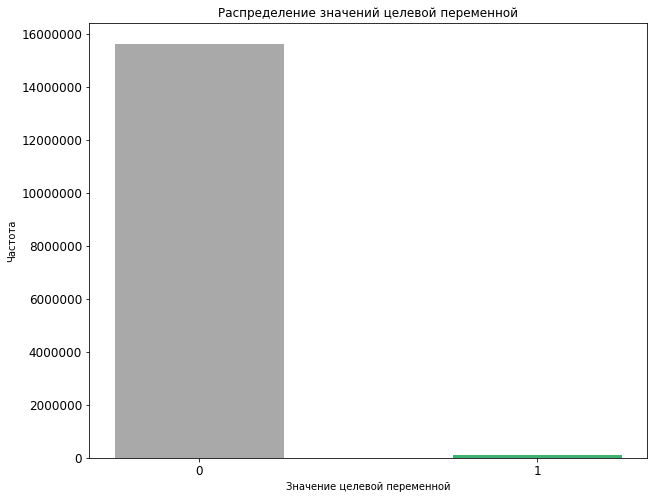

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(df_h['target_actions'].unique(), df_h['target_actions'].value_counts(), width=0.5, color=['darkgrey', 'mediumseagreen'])
ax.set_xlabel('Значение целевой переменной')
ax.set_ylabel('Частота')
ax.set_title('Распределение значений целевой переменной')
ax.tick_params(axis='both', labelsize=12)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [35]:
df_h.groupby('target_actions').size() / len(df_h) * 100

target_actions
0    99.332921
1     0.667079
dtype: float64

  Количество целевых событий в датасете **ga_hits**  - `104908`, что составляет `0.67%` выборки.

###### Сохранение подготовленных датасетов

In [36]:
columns_to_drop = ['hit_page_path', 'event_category', 'event_action']
df_h.drop(columns_to_drop, axis=1, inplace=True)

In [37]:
df_hits_new = df_h.copy()
df_hits_new.head()

,session_id,hit_date,brand,model,target_actions
0,5639623078712724064.1640254056.1640254056,2021-12-23,NaN,NaN,0
1,7750352294969115059.1640271109.1640271109,2021-12-23,fiat,NaN,0
2,885342191847998240.1640235807.1640235807,2021-12-23,volkswagen,polo,0
3,142526202120934167.1640211014.1640211014,2021-12-23,NaN,NaN,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,mercedes-benz,cla-klasse,0


Анализ спроса на автомобили логично проводить, используя только датасет **ga_hits**, поскольку именно он содержит все необходимые данные о действиях клиента на сайте. Следовательно, для ответа на вопрос о лучшем показателе CR (Conversion Rate) в целевые события целесооразно создать дополнительный датасет - **df_auto**

In [39]:
df_auto = df_hits_new[df_hits_new.brand.notna()]
df_auto

,session_id,hit_date,brand,model,target_actions
1,7750352294969115059.1640271109.1640271109,2021-12-23,fiat,NaN,0
2,885342191847998240.1640235807.1640235807,2021-12-23,volkswagen,polo,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,mercedes-benz,cla-klasse,0
6,281215510786615563.1640245516.1640245516,2021-12-23,toyota,NaN,0
7,4024492994895054107.1640269084.1640269084,2021-12-23,mercedes-benz,glc,0
...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,toyota,fortuner,0
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,mercedes-benz,gla-klasse,0
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,toyota,alphard,0
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,bmw,x3,0


In [40]:
df_auto.target_actions.value_counts(dropna=False)

0    3544068
1      31923
Name: target_actions, dtype: int64

In [41]:
missing_values_auto = ((df_auto.isna().sum()/len(df_auto)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values_auto

Процент пропущенных значений:


model             4.28505
session_id        0.00000
hit_date          0.00000
brand             0.00000
target_actions    0.00000
dtype: float64

In [42]:
df_auto.model = df_auto.model.fillna('unknown')
df_auto

,session_id,hit_date,brand,model,target_actions
1,7750352294969115059.1640271109.1640271109,2021-12-23,fiat,unknown,0
2,885342191847998240.1640235807.1640235807,2021-12-23,volkswagen,polo,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,mercedes-benz,cla-klasse,0
6,281215510786615563.1640245516.1640245516,2021-12-23,toyota,unknown,0
7,4024492994895054107.1640269084.1640269084,2021-12-23,mercedes-benz,glc,0
...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,toyota,fortuner,0
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,mercedes-benz,gla-klasse,0
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,toyota,alphard,0
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,bmw,x3,0


In [43]:
missing_values_auto = ((df_auto.isna().sum()/len(df_auto)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values_auto

Процент пропущенных значений:


session_id        0.0
hit_date          0.0
brand             0.0
model             0.0
target_actions    0.0
dtype: float64

In [44]:
df_auto.to_csv('data/ga_auto.csv', index=False)

Для решения остальных задач из датасета событий требуются только данные **target_actions**, как показатель ***Conversion Rate*** и **session_id**, как ***внешний ключ***.

In [45]:
target_sessions = df_hits_new.groupby(['session_id']).agg({'target_actions':'sum'})
target_sessions['target_session'] = target_sessions.target_actions.apply(lambda x: 1 if x > 0 else 0)
target_sessions.drop(['target_actions'], inplace=True, axis=1)
target_sessions

,target_session
session_id,
1000009318903347362.1632663668.1632663668,0
1000010177899156286.1635013443.1635013443,0
1000013386240115915.1635402956.1635402956,0
1000017303238376207.1623489300.1623489300,0
1000020580299877109.1624943350.1624943350,0
...,...
999960188766601545.1626816843.1626816843,0
99996598443387715.1626811203.1626811203,0
999966717128502952.1638428330.1638428330,0


In [46]:
target_sessions.target_session.value_counts(dropna=False)

0    1683850
1      50760
Name: target_session, dtype: int64

In [47]:
target_sessions.to_csv('data/target_sessions.csv')